In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv("new_train_sample.csv")
df_train= pd.DataFrame(df_train)
df_train.head()

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,...,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


# **Data** **Handling**

In [4]:
pd.set_option('display.max_columns', None)
df_train.head(1)

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,BenignPositive,NaN,NaN,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,Casdet,4132,4227,3586,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630


In [5]:
df_train.shape

(4758418, 46)

In [6]:
df_train.isnull().sum()

Unnamed: 0                  0
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2733136
IncidentGrade           25775
ActionGrouped         4730205
ActionGranular        4730205
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4710241
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4721038
FileName  

In [7]:
threshold = len(df_train)* 0.5   # removing 50% above null value
df_train = df_train.dropna(thresh=threshold,axis=1)

In [8]:
df_train.isnull().sum()

Unnamed: 0                0
Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         25775
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                

In [9]:
df_train.IncidentGrade.unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive', nan],
      dtype=object)

In [10]:
df_train["IncidentGrade"].fillna(df_train["IncidentGrade"].mode()[0],inplace=True)

C:\Users\c186\AppData\Local\Temp\ipykernel_11236\1188614922.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["IncidentGrade"].fillna(df_train["IncidentGrade"].mode()[0],inplace=True)


In [11]:
df_train.IncidentGrade.unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive'], dtype=object)

In [12]:
df_train.isnull().sum()

Unnamed: 0            0
Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [13]:
df_train['Timestamp']=pd.to_datetime(df_train['Timestamp'])  # date time dtype

In [14]:
df_train['Day'] = df_train['Timestamp'].dt.day
df_train['Month'] = df_train['Timestamp'].dt.month
df_train['Year'] = df_train['Timestamp'].dt.year
df_train['Hour'] = df_train['Timestamp'].dt.hour
df_train['Time'] = df_train['Timestamp'].dt.time

In [15]:
# drop Timestamp column
df_train.drop("Timestamp",axis=1,inplace=True)  

In [16]:
df_train.head()

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Hour,Time
0,5172780,1709396985476,26,18583,687462,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630,6,6,2024,5,05:56:47
1,8470561,927712939180,33,5065,3990,38,25,Impact,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,3,6,2024,10,10:45:09
2,5897583,1090921697002,201,150787,807590,419,444,Execution,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,13,6,2024,3,03:36:40
3,3288552,1434519079555,204,108287,28575,44,1233,SuspiciousActivity,TruePositive,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007,9177,3586,5,66,242,1445,10630,8,6,2024,16,16:54:57
4,4060961,1005022347708,54,528202,1458226,102,58829,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978,114449,3586,5,66,242,1445,10630,9,6,2024,2,02:48:01


# **Data** **Visualization**

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df_train["IncidentGrade"].value_counts()

IncidentGrade
BenignPositive    2080549
TruePositive      1662087
FalsePositive     1015782
Name: count, dtype: int64

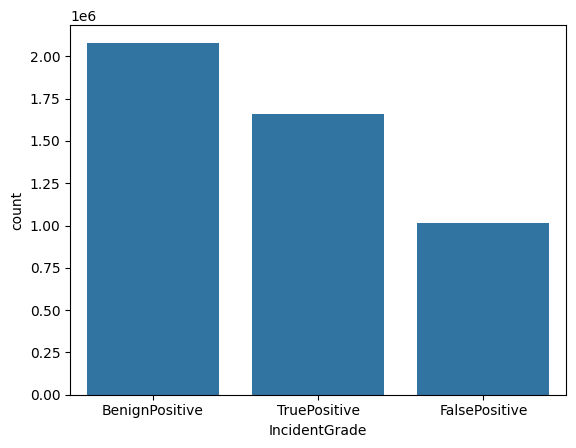

In [19]:
# Target Visual

sns.countplot(x="IncidentGrade",data=df_train)
plt.show()

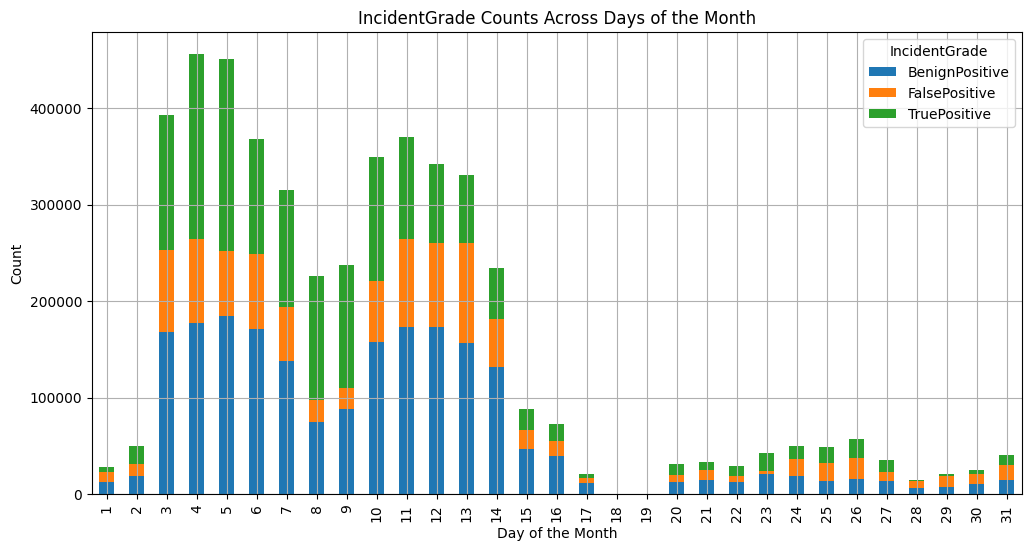

In [20]:
# aggregate data
day_incident = df_train.groupby(["Day","IncidentGrade"]).size().unstack()

#plot
day_incident.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

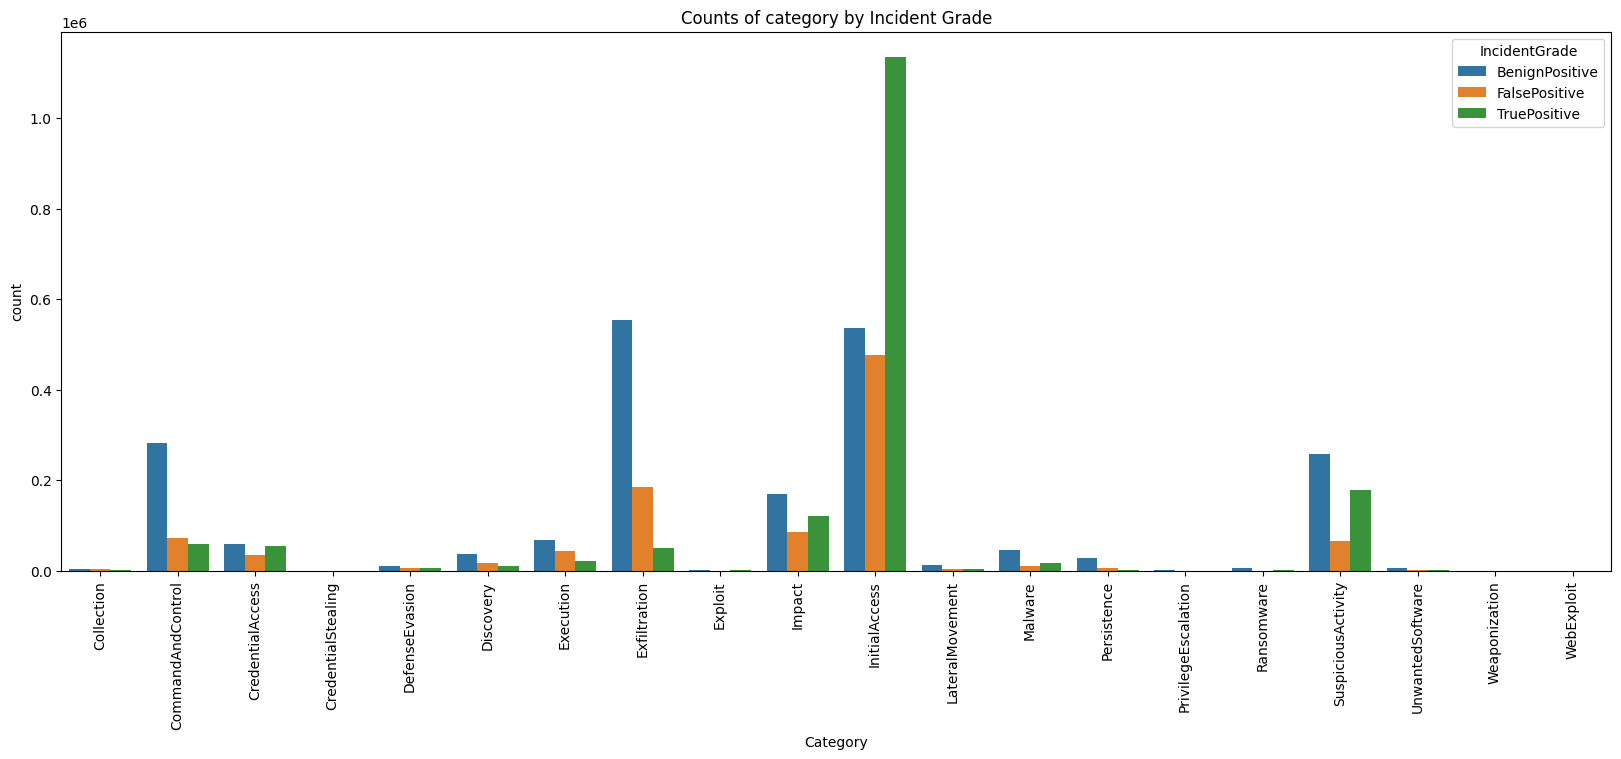

In [21]:
# Aggregate data
catagory_data =df_train.groupby(["Category","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=catagory_data,x="Category", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of category by Incident Grade")
plt.show()

# **Feature** **Selection** **and** **Correlation**

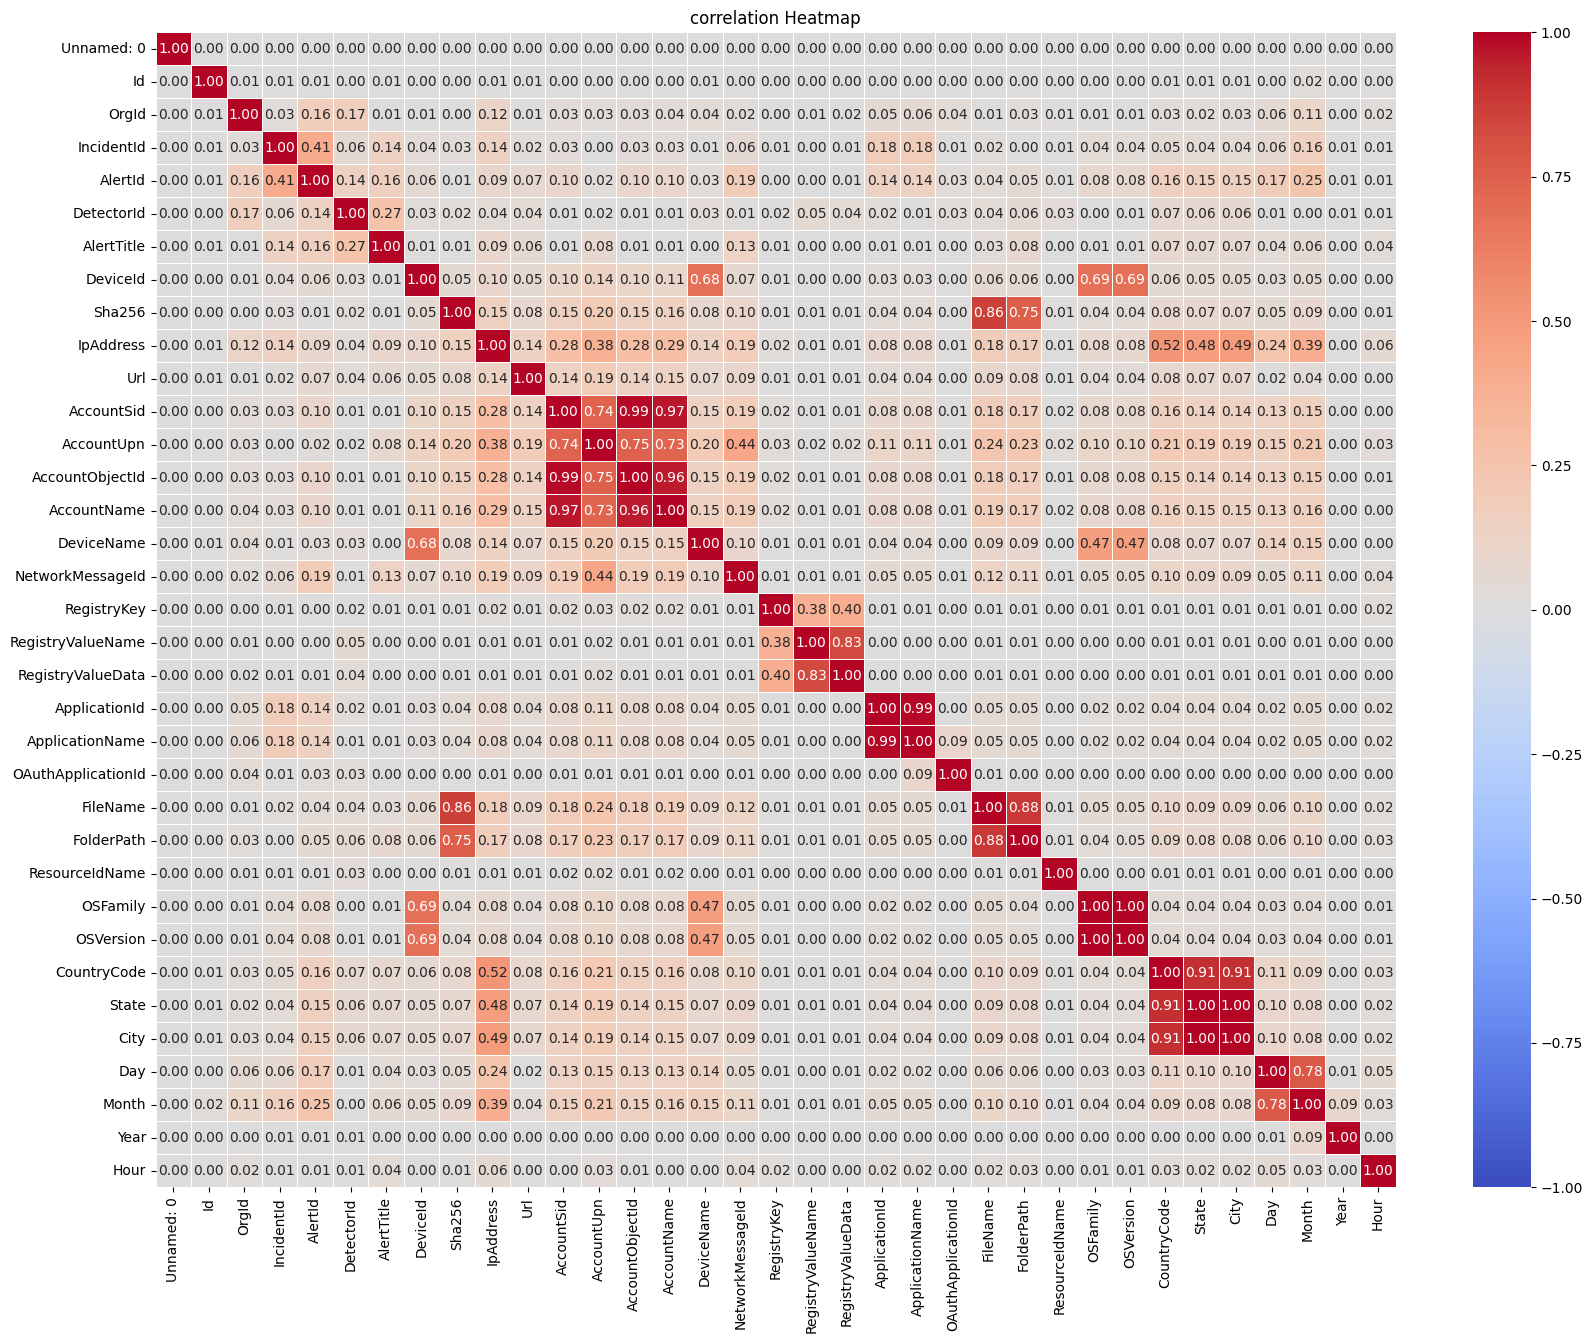

In [22]:
# selecting numerical col
numeric_df = df_train.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [23]:
df_train.columns

Index(['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Day', 'Month', 'Year', 'Hour', 'Time'],
      dtype='object')

In [25]:
#drop 70% Correlate Columns 

df_train.drop(["Unnamed: 0","Id","CountryCode","DetectorId","ApplicationName","Sha256","AccountSid","AccountObjectId","AccountUpn",
               "AccountName","RegistryValueName","RegistryValueData","RegistryKey","OSFamily","OSVersion","FileName","FolderPath",
               "State","DeviceId","DeviceName","NetworkMessageId","OAuthApplicationId","ResourceIdName","Year"],axis=1,inplace=True) 


In [26]:
df_train.columns

Index(['OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'IpAddress', 'Url',
       'ApplicationId', 'City', 'Day', 'Month', 'Hour', 'Time'],
      dtype='object')

In [27]:
df_train

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Month,Hour,Time
0,26,18583,687462,813,Malware,BenignPositive,File,Related,360606,160396,2251,10630,6,6,5,05:56:47
1,33,5065,3990,25,Impact,BenignPositive,Machine,Impacted,360606,160396,2251,10630,3,6,10,10:45:09
2,201,150787,807590,444,Execution,BenignPositive,Machine,Impacted,360606,160396,2251,10630,13,6,3,03:36:40
3,204,108287,28575,1233,SuspiciousActivity,TruePositive,File,Related,360606,160396,2251,10630,8,6,16,16:54:57
4,54,528202,1458226,58829,Exfiltration,BenignPositive,File,Impacted,360606,160396,2251,10630,9,6,2,02:48:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,142,93987,15739,7836,Exfiltration,FalsePositive,MailMessage,Impacted,360606,160396,2251,10630,10,6,10,10:25:17
4758414,36,1001,257479,2,CommandAndControl,FalsePositive,User,Impacted,360606,160396,2251,10630,11,6,19,19:30:52
4758415,851,31194,1518250,1,InitialAccess,BenignPositive,MailMessage,Related,360606,160396,2251,10630,9,6,4,04:27:41
4758416,12,2419,1203,1334,Impact,BenignPositive,Ip,Related,546,160396,2251,10630,21,5,23,23:01:11


# **Encoding**

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 16 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   OrgId          int64 
 1   IncidentId     int64 
 2   AlertId        int64 
 3   AlertTitle     int64 
 4   Category       object
 5   IncidentGrade  object
 6   EntityType     object
 7   EvidenceRole   object
 8   IpAddress      int64 
 9   Url            int64 
 10  ApplicationId  int64 
 11  City           int64 
 12  Day            int32 
 13  Month          int32 
 14  Hour           int32 
 15  Time           object
dtypes: int32(3), int64(8), object(5)
memory usage: 526.4+ MB


In [29]:
df_train.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'], dtype='object')

In [30]:
catagory_columns = (['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'])

In [31]:
from sklearn.preprocessing import  LabelEncoder

In [32]:
encoding = {}

for i in catagory_columns:
    le = LabelEncoder()
    df_train[i] = le.fit_transform(df_train[i])
    encoding[i] = le
    

In [ ]:
df_train

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Month,Hour,Time
0,26,18583,687462,813,12,0,9,1,360606,160396,2251,10630,6,6,5,21407
1,33,5065,3990,25,9,0,17,0,360606,160396,2251,10630,3,6,10,38709
2,201,150787,807590,444,6,0,17,0,360606,160396,2251,10630,13,6,3,13000
3,204,108287,28575,1233,16,2,9,1,360606,160396,2251,10630,8,6,16,60897
4,54,528202,1458226,58829,7,0,9,0,360606,160396,2251,10630,9,6,2,10081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,142,93987,15739,7836,7,1,19,0,360606,160396,2251,10630,10,6,10,37517
4758414,36,1001,257479,2,1,1,30,0,360606,160396,2251,10630,11,6,19,70252
4758415,851,31194,1518250,1,10,0,19,1,360606,160396,2251,10630,9,6,4,16061
4758416,12,2419,1203,1334,9,0,13,1,546,160396,2251,10630,21,5,23,82871


In [ ]:
# Save for backup
df_train.to_csv("Final_TrainDF",index=False)

# **Model**

In [33]:
# Drop rows where target is NaN
df_train = df_train.dropna(subset=['IncidentGrade'])

x = df_train.drop('IncidentGrade', axis=1)
y = df_train['IncidentGrade']

In [34]:
x

,OrgId,IncidentId,AlertId,AlertTitle,Category,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Month,Hour,Time
0,26,18583,687462,813,12,9,1,360606,160396,2251,10630,6,6,5,21407
1,33,5065,3990,25,9,17,0,360606,160396,2251,10630,3,6,10,38709
2,201,150787,807590,444,6,17,0,360606,160396,2251,10630,13,6,3,13000
3,204,108287,28575,1233,16,9,1,360606,160396,2251,10630,8,6,16,60897
4,54,528202,1458226,58829,7,9,0,360606,160396,2251,10630,9,6,2,10081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,142,93987,15739,7836,7,19,0,360606,160396,2251,10630,10,6,10,37517
4758414,36,1001,257479,2,1,30,0,360606,160396,2251,10630,11,6,19,70252
4758415,851,31194,1518250,1,10,19,1,360606,160396,2251,10630,9,6,4,16061
4758416,12,2419,1203,1334,9,13,1,546,160396,2251,10630,21,5,23,82871


In [37]:
# Model 1

from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2,random_state=42 )

gb_classifier = GradientBoostingClassifier(random_state=42)

gb_classifier.fit(x_train,y_train)

y_pred = gb_classifier.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average="weighted")
recall = recall_score(y_test,y_pred, average="weighted")
f1_score = f1_score(y_test,y_pred, average="weighted")

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1_Score : {f1_score:.2f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy : 0.80
Precision : 0.82
Recall : 0.80
F1_Score : 0.79

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.96      0.82    415850
           1       0.89      0.56      0.69    203214
           2       0.92      0.74      0.82    332620

    accuracy                           0.80    951684
   macro avg       0.84      0.75      0.78    951684
weighted avg       0.82      0.80      0.79    951684



In [38]:
# Model 2

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

#x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2,random_state=42 )

XGBClassifier = XGBClassifier(random_state=42)

XGBClassifier.fit(x_train,y_train)

y_pred = XGBClassifier.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average="weighted")
recall = recall_score(y_test,y_pred, average="weighted")
f1_score = f1_score(y_test,y_pred, average="weighted")

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1_Score : {f1_score:.2f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy : 0.92
Precision : 0.92
Recall : 0.92
F1_Score : 0.91

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92    415850
           1       0.93      0.84      0.88    203214
           2       0.95      0.90      0.93    332620

    accuracy                           0.92    951684
   macro avg       0.92      0.90      0.91    951684
weighted avg       0.92      0.92      0.91    951684



In [39]:
# Model 3

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

#x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2,random_state=42 )

RandomForest = RandomForestClassifier(random_state=42)

RandomForest.fit(x_train,y_train)

y_pred = RandomForest.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average="weighted")
recall = recall_score(y_test,y_pred, average="weighted")
f1_score = f1_score(y_test,y_pred, average="weighted")

print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1_Score : {f1_score:.2f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy : 0.98
Precision : 0.98
Recall : 0.98
F1_Score : 0.98

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    415850
           1       0.98      0.96      0.97    203214
           2       0.99      0.98      0.98    332620

    accuracy                           0.98    951684
   macro avg       0.98      0.97      0.98    951684
weighted avg       0.98      0.98      0.98    951684

